## ReTap - UPDRS-Tapping Assessment - Feature Exploration

This notebooks helps to visualise and statistically tst created tapping-features.



### 0. Loading packages and functions, defining paths



In [1]:
# Importing Python and external packages
import os
import sys
import importlib
import pandas as pd
import numpy as np
import sklearn as sk
import scipy
import matplotlib.pyplot as plt
# import matplotlib.gridspec as gridspec



In [2]:
# check some package versions for documentation and reproducability
print('Python sys', sys.version)
print('pandas', pd.__version__)
print('numpy', np.__version__)
# print('mne_bids', mne_bids.__version__)
# print('mne', mne.__version__)
print('sci-py', scipy.__version__)
print('sci-kit learn', sk.__version__)


## developed with:
# Python sys 3.9.7 (default, Sep 16 2021, 08:50:36) 
# [Clang 10.0.0 ]
# pandas 1.3.4
# numpy 1.20.3
# mne_bids 0.9
# mne 0.24.1
# sci-py 1.7.1
# sci-kit learn 1.0.1

## Currently (own env) since 31.08.22
# Python sys 3.9.12 (main, Jun  1 2022, 06:36:29) 
# [Clang 12.0.0 ]
# pandas 1.4.3
# numpy 1.21.5
# sci-py 1.7.3
# sci-kit learn 1.1.1

Python sys 3.9.12 (main, Jun  1 2022, 06:36:29) 
[Clang 12.0.0 ]
pandas 1.4.3
numpy 1.21.5
sci-py 1.7.3
sci-kit learn 1.1.1


In [43]:
# own data preprocessing functions
# import tap_load_data.updrsTapping_import as tap_import
# import tap_load_data.tapping_preprocess as tap_preproc
# import tap_load_data.tapping_find_blocks as find_blocks
# import tap_load_data.tapping_impact_finder as tap_impact
# import tap_load_data.tapping_time_detect as tap_times


# ft extraction
# import tap_extract_fts.tapping_featureset as tap_fts_set
# import tap_extract_fts.tapping_extract_features as tap_ft_extr
import tap_extract_fts.tapping_postFeatExtr_calc as postExtrCalc

# own data exploration functions
import tap_plotting.retap_visualise_fts as fts_boxplot

# own helper functions
import retap_utils.utils_dataManagement as utils_dataMn
# from tap_extract_fts import main_featExtractionClass as mainFtExtr

### Load or creating tapping-traces

In [ ]:
### IMPORT CREATED CLASSES FROM FILES
from tap_extract_fts.main_featExtractionClass import FeatureSet, singleTrace

# importlib.reload(mainFtExtr)
# importlib.reload(utils_dataMn))

deriv_path = os.path.join(utils_dataMn.get_local_proj_dir(), 'data', 'derivatives')

# berClass = utils_dataManagement.load_class_pickle(os.path.join(deriv_path, 'ftClass_bertest.P'))
# dusClass = utils_dataManagement.load_class_pickle(os.path.join(deriv_path, 'ftClass_DUS.P'))

ftClass = utils_dataMn.load_class_pickle(os.path.join(deriv_path, 'ftClass_ALL_20221123.P'))

In [4]:
### CREATE DATA-FT CLASSES OVER NOTEBOOK

# importlib.reload(mainFtExtr)
# importlib.reload(tap_run)
# importlib.reload(utils_dataManagement)
# importlib.reload(tap_import)
# importlib.reload(tap_preproc)
# importlib.reload(find_blocks)
# importlib.reload(tap_impact)
# importlib.reload(tap_times)
# importlib.reload(tap_fts_set)
# importlib.reload(tap_ft_extr)





# dusdata = mainFtExtr.FeatureSet(
#     subs_incl = ['DUS024',],# 'DUS007'],
#     centers_incl = [ 'DUS', ],
#     verbose=False,
# )

# nantest = mainFtExtr.FeatureSet(
#     subs_incl = ['BER019', 'BER019'],# 'DUS007'],
#     centers_incl = [ 'BER', ],
#     verbose=False,
# )


<module 'tap_load_data.tapping_time_detect' from '/Users/jeroenhabets/Research/CHARITE/projects/tapping/code/updrsTapping_repo/tap_load_data/tapping_time_detect.py'>

### 2a. Visualise detected Taps

In [66]:
print(ftClass.incl_traces[::30])
print()
print(vars(ftClass.BER019_M0S0_L_3.fts).keys())

['BER021_M0S1_L_1', 'BER029_M1S0_L_3', 'BER051_M1S0_L_1', 'BER038_M0S0_L_3', 'BER049_M0S0_R_1', 'BER028_M1S0_L_1', 'BER033_M1S1_R_1', 'BER023_M1S0_R_2', 'BER025_M0S1_R_1', 'BER024_M1S1_L_2', 'BER032_M0S0_L_2', 'DUS008_M0S0_L_1', 'DUS025_M1S0_L_1']

dict_keys(['triax_arr', 'fs', 'impacts', 'tapDict', 'updrsSubScore', 'nTaps', 'freq', 'tap_durations', 'intraTapInt', 'tapRMS', 'tapRMSnrm', 'impactRMS', 'raise_velocity', 'jerkiness_taps', 'jerkiness_trace', 'mean_tapRMS', 'coefVar_tapRMS', 'IQR_tapRMS', 'decr_tapRMS', 'slope_tapRMS', 'mean_tapRMSnrm', 'coefVar_tapRMSnrm', 'IQR_tapRMSnrm', 'decr_tapRMSnrm', 'slope_tapRMSnrm', 'mean_impactRMS', 'coefVar_impactRMS', 'IQR_impactRMS', 'decr_impactRMS', 'slope_impactRMS', 'mean_raise_velocity', 'coefVar_raise_velocity', 'IQR_raise_velocity', 'decr_raise_velocity', 'slope_raise_velocity', 'mean_intraTapInt', 'coefVar_intraTapInt', 'IQR_intraTapInt', 'decr_intraTapInt', 'slope_intraTapInt', 'mean_jerkiness_taps', 'coefVar_jerkiness_taps', 'IQR_jer

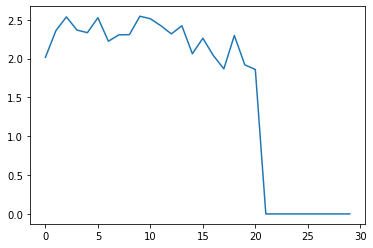

In [69]:
trace = getattr(ftClass, 'BER029_M1S0_L_3')
plt.plot(trace.fts.tapRMS[:30])

In [72]:
print(trace.fts.decr_tapRMS, trace.fts.slope_tapRMS)

-1.0 -3.716317901886921e-05


In [88]:
for tap in trace.fts.tapDict:

    print(tap)


[403. 442. 453. 459. 464. 496. 501.]
[505. 537. 552. 556. 561. 595. 600.]
[601. 631. 646. 651. 654. 692. 696.]
[699. 733. 748. 752. 760. 798. 804.]
[805. 835. 854. 859. 862. 897. 901.]
[ 902.  939.  956.  962.  965. 1008. 1013.]
[1014. 1042. 1059. 1062. 1068. 1124. 1128.]
[1130. 1157. 1172. 1177. 1184. 1223. 1228.]
[1234. 1262. 1277. 1282. 1287. 1338. 1342.]
[1343. 1372. 1390. 1407. 1428. 1431. 1436.]
[1439. 1467. 1484. 1486. 1492. 1543. 1548.]
[1554. 1582. 1600. 1606. 1609. 1661. 1665.]
[1667. 1694. 1712. 1719. 1722. 1761. 1766.]
[1767. 1804. 1825. 1859. 1882. 1889. 1893.]
[1896. 1929. 1932. 1939. 1950. 2008. 2012.]
[2015. 2049. 2067. 2073. 2078. 2120. 2124.]
[2126. 2159. 2172. 2173. 2179. 2246. 2251.]
[2257. 2293. 2314. 2319. 2348. 2351. 2356.]
[2361. 2392. 2401. 2405. 2418. 2466. 2472.]
[2473. 2509. 2528. 2534. 2539. 2575. 2580.]
[2581. 2615. 2624. 2629. 2652. 2672. 2677.]


In [71]:
np.nanmean(trace.fts.tapRMS[-5:])

0.0

In [78]:
importlib.reload(postExtrCalc)

for m in ['regr_slope', 'diff_in_mean']:
    print(m, postExtrCalc.ft_decrement(
        ft_array=trace.fts.tapRMS[:20],
        method=m,
    ))

regr_slope -0.0153369597417885
diff_in_mean -0.10577583014543712


In [6]:
import tap_plotting.retap_check_taps as plot_taps

In [7]:
### PLOT DETECTED TAPS
importlib.reload(plot_taps)
plot_taps.plot_detected_taps(ftClass)

### 2b. Visualise Features as Group with Boxplots

In [74]:
import tap_plotting.tapping_feat_boxplots as tapBoxplots
import tap_plotting.retap_visualise_fts as retapViz

In [579]:
print(vars(ftClass.BER033_M0S1_R_2).keys())
print(ftClass.BER033_M0S1_R_2.fts.nTaps)

dict_keys(['sub', 'state', 'side', 'rep', 'center', 'filepath', 'tap_score', 'goal_Fs', 'to_extract_feats', 'acc_sig', 'fs', 'impact_idx', 'fts'])
45


In [587]:
# print(vars(ftClass.BER033_M0S1_R_2.fts).keys())
# 21 blocks false positive, missed 1
# blocks without taps

block_durations = []
ntaps = []
subs = []
scores = []

for trace in ftClass.incl_traces:
    subs.append(getattr(ftClass, trace).sub)
    scores.append(getattr(ftClass, trace).tap_score)

    try:
        ntaps.append(getattr(ftClass, trace).fts.nTaps)
        block_durations.append(getattr(ftClass, trace).acc_sig.shape[1] / 250)
        
    except AttributeError:
        print(trace)
print()
print(f'UPDRS subscores: {np.unique(scores, return_counts=True)}')
print(f'In {len(np.unique(subs))} unique subjects, {len(ftClass.incl_traces)} tap blocks found')
print(f'block durations: {np.mean(block_durations)} +/- {np.std(block_durations)}')
print(f'n taps: {np.mean(ntaps)} +/- {np.std(ntaps)}')

BER023_M1S0_R_3
DUS022_M0S0_L_1
DUS006_M0S0_L_1

UPDRS subscores: (array([0, 1, 2, 3, 4]), array([ 41, 151, 120,  59,   5], dtype=int64))
In 37 unique subjects, 376 tap blocks found
block durations: 11.801747989276139 +/- 2.5109399563989436
n taps: 29.50402144772118 +/- 13.069133967035977


In [16]:
a = np.array([91,93, 95, 93, 95, 97, 90, ])
np.polyfit(np.arange(len(a)), a, 1)

array([ 0.17857143, 92.89285714])

In [499]:
importlib.reload(retapViz)

fts_include = [
    'mean_tapRMSnrm', 'coefVar_tapRMSnrm', 'decr_tapRMSnrm', 'slope_tapRMSnrm',
    'mean_intraTapInt', 'coefVar_intraTapInt', 'decr_intraTapInt', 'slope_intraTapInt',
    'mean_jerkiness', 'coefVar_jerkiness', 'decr_jerkiness', 'slope_jerkiness'
]

tempScoreDict, fts_include = retapViz.sort_fts_on_tapScore(
    ftClass=ftClass,
)

retapViz.plot_boxplot_feats_per_subscore(
    fts_include=fts_include,
    sorted_feat_dict=tempScoreDict,
    plot_title='ReTap DUS and BER',# and DUS',
    figsave_name=f'retap_fullCohort_{merge_meth}_v2',
    figsave_dir=os.path.join(
        utils_dataManagement.find_onedrive_path('figures'),
        'fts_boxplots',
    ),
    show=False,
)


(mean_tapRMSnrm)	0 taps available for BER023_M1S0_R_3 (tap-subscore: 3)
(mean_tapRMSnrm)	0 taps available for DUS022_M0S0_L_1 (tap-subscore: 3)
(mean_tapRMSnrm)	0 taps available for DUS006_M0S0_L_1 (tap-subscore: 2)
(coefVar_tapRMSnrm)	0 taps available for BER023_M1S0_R_3 (tap-subscore: 3)
(coefVar_tapRMSnrm)	0 taps available for DUS022_M0S0_L_1 (tap-subscore: 3)
(coefVar_tapRMSnrm)	0 taps available for DUS006_M0S0_L_1 (tap-subscore: 2)
(decr_tapRMSnrm)	0 taps available for BER023_M1S0_R_3 (tap-subscore: 3)
(decr_tapRMSnrm)	0 taps available for DUS022_M0S0_L_1 (tap-subscore: 3)
(decr_tapRMSnrm)	0 taps available for DUS006_M0S0_L_1 (tap-subscore: 2)
(slope_tapRMSnrm)	0 taps available for BER023_M1S0_R_3 (tap-subscore: 3)
(slope_tapRMSnrm)	0 taps available for DUS022_M0S0_L_1 (tap-subscore: 3)
(slope_tapRMSnrm)	0 taps available for DUS006_M0S0_L_1 (tap-subscore: 2)


### 1d. Visualise single Features over Tap-course


still to adapt to current feature class objects

In [151]:
ft = 'tapRMS_svm'

sub = '007'
side='L'

mA_range = ['0', '05', '1', '15', '2', '25']

colors = {'Off': 'blue', 'On': 'green'}
fs=14

for ft in [
    'tapRMS_svm',
    # 'upVelo_svm',
    # 'impactRMS_svm',
    # 'dirChange_taps',
    # 'tap_durations',
]:

    plt.figure(figsize=(12, 6))

    # get mean feature-course over 3 tapping-blocks of 10 sec
    for med in ['Off', 'On']:

        for a, mA in enumerate(mA_range):

            try:
                meanFt = [
                    getattr(
                        FEATS[f'{sub}_{side}_{med}_{mA}mA_b{bN}'],
                        ft
                    ) for bN in [1,2,3]
                ]

            except KeyError:  # tap-run not existing
                continue  # dont calculate and plot line

            except AttributeError:  # no taps detected -> no features extracted
                meanFt = []
                emptyCount = ' '

                for bN in [1,2,3]:
                    key = f'{sub}_{side}_{med}_{mA}mA_b{bN}'
                    
                    if ft in vars(FEATS[key]).keys():
                        meanFt.append(getattr(FEATS[key], ft))
                    
                    else:
                        emptyCount += '*'
                
                if meanFt == []:  # all runs without taps/features
                    meanFt = [[0]]

            # transform ft-lists per run into mean array
            maxLen = max(
                [len(meanFt[n]) for n in range(len(meanFt))]
            )
            meanFtArr = np.array(
                [[np.nan] * maxLen] * len(meanFt))
            
            for n, l in enumerate(meanFt):
                meanFtArr[n, :len(l)] = l
            
            meanFtPlot = np.nanmean(meanFtArr, axis=0)

            # average updrsSubScore over 3 runs
            meanTapScore = np.round(np.mean([
                getattr(
                    FEATS[f'{sub}_{side}_{med}_{mA}mA_b{bN}'],
                    'updrsSubScore'
                ) for bN in [1,2,3]
            ]), 1)

            tapLabel = f'Med{med} {mA} mA  (updrs {meanTapScore})'
            
            try:
                tapLabel += emptyCount
                del(emptyCount)

            except:
                tapLabel = tapLabel

            plt.plot(
                meanFtPlot, c=colors[med],
                alpha=.1 + (.15 * a),
                label=tapLabel,
            )
            

            

    plt.ylabel(f'{ft} (a.u.)', size=fs,)
    plt.xlabel('Taps over time (# of tap)', size=fs,)

    plt.tick_params(axis='both', size=fs, labelsize=fs)

    plt.legend(
        frameon=False, ncol=1,
        bbox_to_anchor=(1, .9), loc='upper left',
        fontsize=fs,
    )

    plt.title(
        f'Feature course of "{ft}"    -     '
        f'Sub-{sub}, {side}-side'
        f'\n(mean over 3 10-sec blocks in same condition)',
        fontsize=fs+6,
    )
    plt.tight_layout()

    plt.savefig(
        os.path.join(
            fig_dir,
            'ft_course_tapping',
            f'TEST____{sub}_{side}_ftCourse_{ft}'
        ),
        dpi=150, facecolor='w',
    )
    plt.close()

/var/folders/7d/4ptht2m910d1y872jrgp9cq40000gp/T/ipykernel_32352/1711045685.py:63: RuntimeWarning: Mean of empty slice
  meanFtPlot = np.nanmean(meanFtArr, axis=0)
